In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import special
%matplotlib inline

## 44. Эллипс
Уравнение *эллипса*:$$
\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1
$$
Периметр эллипса равен
$$
L=4a\int \limits _{0}^{\pi /2}{\sqrt{1-\varepsilon^2\cos^2\varphi}}\,d\varphi = 4a E(\varepsilon),
$$ 
где $E(\varepsilon)$ -- полный эллиптический интеграл 2-го рода.

 Условие:

 1) Проволоку длиной $10$ *см* хотят изогнуть в виде эллипса, так, чтобы одна из его полуосей равнялась $1$ *см*. Чему равна вторая полуось? Запишите соответствующее уравнение и решите его численно. Постройте полученный эллипс (позаботьтесь, чтобы масштаб по обеим осям был одинаковым).
 
 2) Сравните ваше решение с тем, которое получается, если для вычисления $L$ использовать приближенную формулу
$$
L\approx 4\cdot{\frac {\pi ab+(a-b)^{2}}{a+b}}.
$$ 
  1) Пусть меньшая полуось $b = 1$, 
$$\varepsilon={\sqrt {1-{\frac {1}{a^{2}}}}}, a \neq 0$$
  Тогда 
  $$L=4a\int \limits _{0}^{\pi /2}{\sqrt{1-{(1-{\frac {1}{a^{2}})}}\cos^2\varphi}}\,d\varphi = 4a E(\sqrt {1-{\frac {1}{a^{2}}}}) = 10$$
  Требуется найти такое значение $a$, при котором $L\approx10$.
  
  Для нахождения $a$ используем метод `scipy.optimize.brentq`, который возвращает значение аргумента функции, при котором она обращается в $0$. Если такого числа нет в данном промежутке, возвращает значение при котором функция  принимает значение ближайше к $0$.

  Так как эллиптический интеграл второго рода нельзя вычислить символьно, используем метод `scipy.special.ellipe` для его численного вычисления.
  
  Тогда:


In [7]:
b = 1

def f(a):
    e_sq = 1 - b**2/a**2
    return 4*a*special.ellipe(e_sq) - 10 # зануляем значение f

def g(a):
    e_sq = 1 - b**2/a**2
    return 4*a*special.ellipe(e_sq)

a = optimize.brentq(f, 1e-100, 4) #за левую границу берем наименьшее число ~0
L = g(a)
print("L = ", L, "при a = ", a)

L =  10.00000000000017 при a =  2.08668972105075


Следовательно, $L\approx10$, при $b = 1$ и $a\approx2.08668972105075$

График такого эллипса будет выглядеть следующим образом:

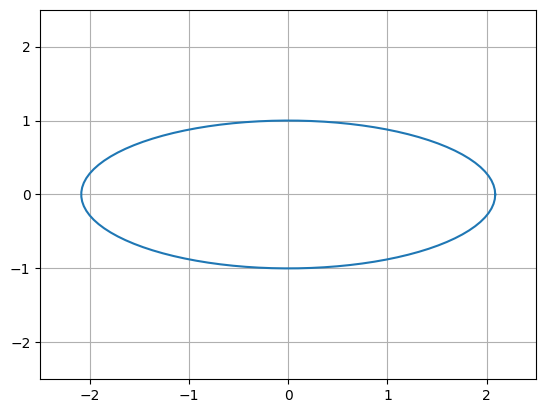

In [8]:
t = np.linspace(0, 2*np.pi, 100)
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
plt.plot(a*np.cos(t), b*np.sin(t))
plt.grid()

2) Используем упрощенную формулу расчета периметра эллипса 

In [12]:
b = 1
def f(a):
  return 4*(np.pi*a*b +(a-b)**2)/(a+b) - 10 #упрощенная формула периметра
    
a_s = optimize.brentq(f, 1e-100, 4)
L_s = 4*(np.pi*a_s*b + (a_s - b)**2) / (a_s + b)
print("L = ", L_s, "при a = ", a_s)

L =  10.000000000000291 при a =  2.0796741761774187


Сравнивая результаты, получаем:

In [19]:
L_diff = (abs(10 - L)/10)*100
L_s_diff = (abs(10 - L_s)/10)*100
print("Ошибка при вычислении через Е(е) L = ", L_diff, 
      "\nОшибка при вычислении по упрощенной формуле L_s = ", L_s_diff)

Ошибка при вычислении через Е(е) L =  1.7053025658242404e-12 
Ошибка при вычислении по упрощенной формуле L_s =  2.9132252166164104e-12


Видим, что численное вычисление периметра эллипса через *эллиптические интегралы второго рода* дает более точный результат, чем вычисление по упрощенной формуле.

**Вывод:** Я нашел искомые параметры эллипса, пользуясь численным вычислением эллиптического интегралла второго рода, а также сравнил эти результаты с теми, которые получил, пользуясь в вычислениях *упрощенную формулу периметра эллипса* и показал, что при её использовании мы получаем менее точный результат, нежели при использовании *эллиптического интеграла второго рода*.  